# Neural Networks - Theory 2

# Importing Packages

In [60]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from typing import Mapping, List

# Convolution Operation

Consider a grey-scale image $I$ of dimensions $m \times n$ (height, width) this corresponds to a $m \times n$ matrix so that it pixels represent the intensity of white colour (255 or 1.0 for re-scaled images) and black is when the value in the pixel is 0.0. 

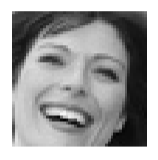

Assume that we wish to apply a filter (kernel) on this image, so that we get, for example, the edges. 

## Filters/kernels

 A filter/kernel, also known as convolution matrix, is a matrix (typically of a small size, e.g., $3 \times 3$) used for image processing such as blurring, sharpening, edge detection, and more. 
 
- Blurring using Box Blur kernel
$ \frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$
- Sharpening kernel $ \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$
- Edge detection by Bottom Sobel kernel
$ \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$

## Convolution Operation

Take the filter $K$ of $p \times q$ size that you wish to apply. 

The convolution of $I$ and $K$ is given by 
$$(I \ast K)_{i, j} = \sum_{k=1}^{p}\sum_{l=1}^{q} I_{i+k-1, j+l-1}K_{k, l}$$

for $i \in \{1, \ldots, m-p+1\}$, $j \in \{1, \ldots, n-q+1\}$

### Example

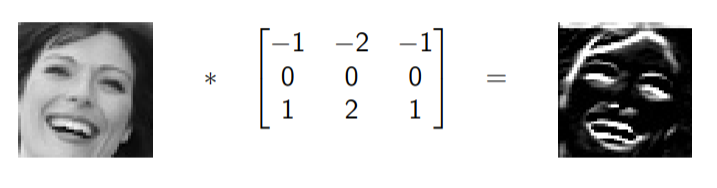

It is easy to calculate convolution operation when we view it through the sliding window/filter. This is demonstrated on the following image:

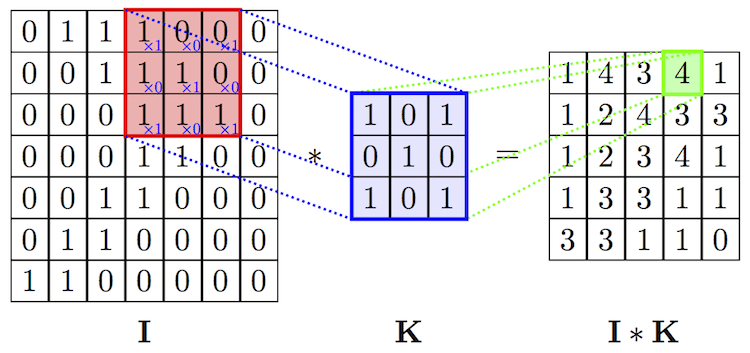

Use the filter/kernel as a sliding window (size of the slide in both right and down directions is $1$ box/cell, the size of the slide is referred to as a **stride**) on the image matrix. Then multiply the numbers in the same cells and sum the results up. 

**Observation**: 

In the example $I$ is a 7 × 7 matrix and it is convolved with
a filter $K$ of size 3 × 3 the size of the resulting matrix $I \ast K$ is
5 × 5.


### Time for Exercise 2.1

## Dimensionality reduction

 Given an $m \times n$ image matrix $I$ and  $p \times q$ kernel/filter $K$, the convolution $I \ast K$ is a $(m-p+1) \times (n-q+1)$ matrix. 
    
If we don't want to decrease the size of the resulting image, we apply padding, we pad our image (for example with zeros) from the top and left to reach the size $(m + p - 1) \times (n+q-1)$. Denote the padded image as $\widehat{I}$. Then the convolution of $\widehat{I} \ast K$ has dimensions $(m+p-1 - p + 1) \times (n+q-1 -q + 1)= m \times n$.


## Pooling

Another operation that is used in the neural networks that we will shortly introduced is called pooling. 

It summarises the features covered by the sliding window / filter. The two most used pooling techniques are max-pooling and average-pooling. 

We introduce these operations via an example:

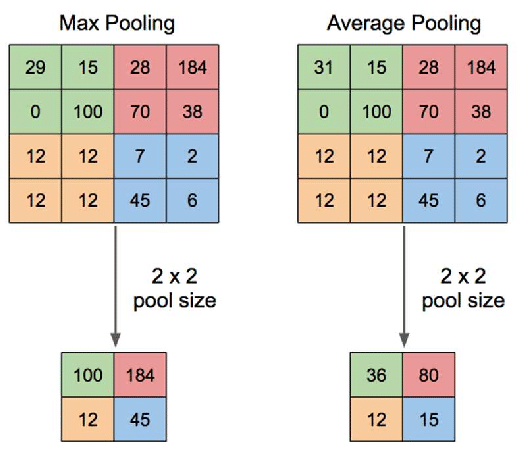

Let’s see the example of pooling on the image

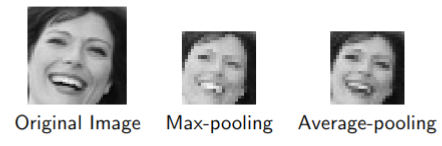

# Convolutional Neural Networks (CCNs) - A bit of history

Convolutional neural networks (CNNs) were introduced in 1989 by Yann Le Cun  (currently VP and Chief AI Scientist at Meta former Facebook) et al for recognition of handwritten zip-codes. Despite successful applications, they did not conquer the field of computer vision immediately. This us due to the lack of computational power and data in late 80s / early 90s.

## What does convolution do in a neural network?

Convolution tries to find a local pattern in every location of the input image.

When we use convolution across multiple layers, it finds the collection of local patterns.

Example of patterns finding:

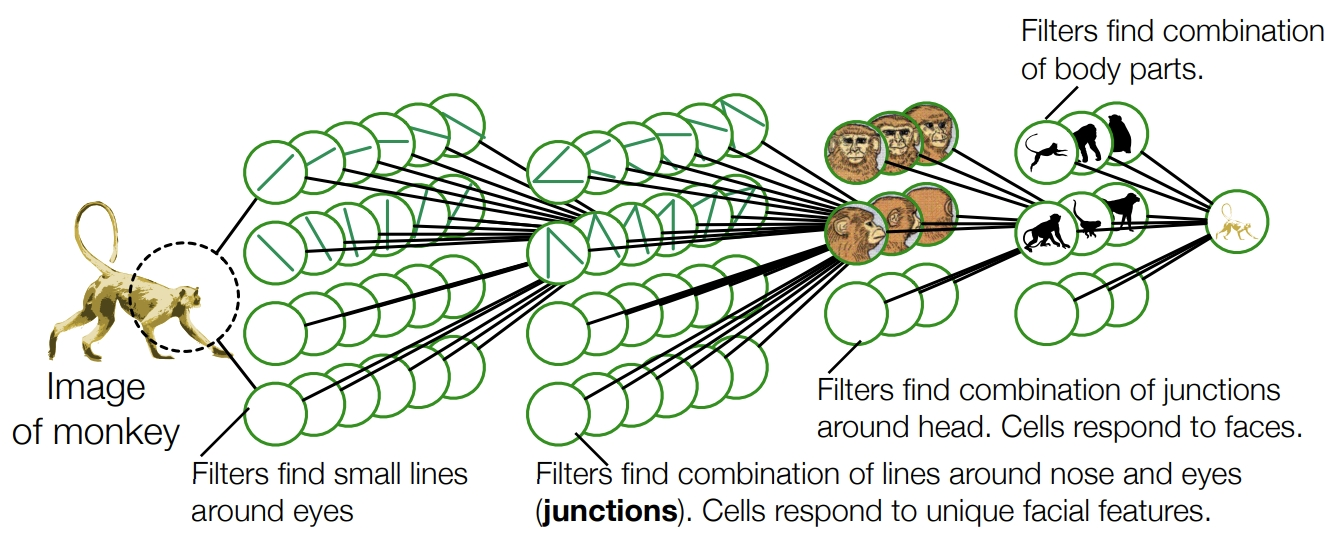

## LeNet

The architecture of the first CNN was the following:

Below we go through the network layer-by-layer.


In [70]:
lenet = tf.keras.Sequential()

##  Layer C1

- **INPUT**: The input for the LeNet is a $32\times 32$ greyscale image. In tensor (multidimenional array) notation its shape is $32 \times 32 \times 1$.
    
- **Convolution**: Input passes through the first convolution layer with 6 filters (also known as feature maps) each filter is $5 \times 5$, the stride is $1$ and there is no padding. We perform $6$ convolution operations between the image and 6 filters. 
    
- **OUTPUT**: The output is the tensor (multidimensional array) of size $28 \times 28 \times 6$
    
- **Activation function**: $\tanh$

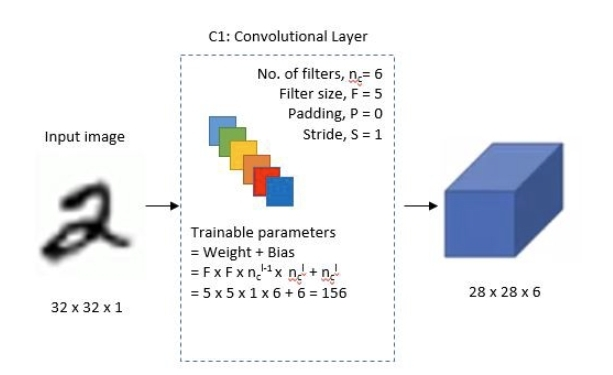

In [71]:
layer_c1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation="tanh", name="C1")
lenet.add(layer_c1)

## Layer S2

- **INPUT**: Tensor of size $28 \times 28 \times 6$.

- **Pooling**: The average pooling with a $2 \times 2$ filter and stride $2$ is applied. 

- **Output**: The input tensor is reduced to $14 \times 14 \times 6$ shape. 

- **Number of trainable parameters**: Zero, max-pooling and average-pooling layers  does not consist of any weights or biases. 

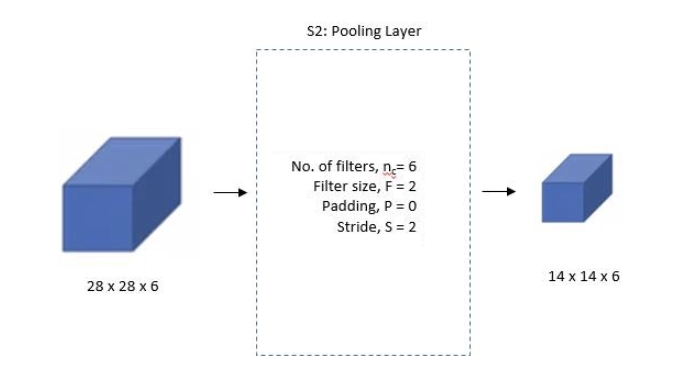

In [72]:
layer_s2 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name="S2")
lenet.add(layer_s2)

## Layer C3

- **INPUT**: Tensor of size $14 \times 14 \times 6$
    
- **Convolution**: The input passes through the  convolution layer with 16 filters /feature maps each filter is $5 \times 5$, the stride is $1$ and there is no padding. We perform $16$ convolution operations between the tensor and 16 filters. 
    
- **OUTPUT**: The output tensor has shape $10 \times 10 \times 16$. 
    
- **Activation function**: $\tanh$

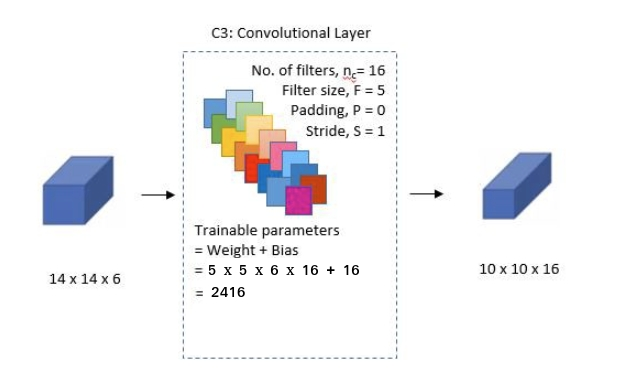

In [73]:
layer_c3 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation="tanh", name="C3")
lenet.add(layer_c3)

## Layer S4

- **INPUT**: Tensor of size $28 \times 28 \times 6$.

- **Pooling**: The average pooling with a $2 \times 2$ filter and stride $2$ is applied. 

- **Output**: The input tensor is reduced to $5 \times 5 \times 6$ shape. 

- **Number of trainable parameters**: Zero, max-pooling and average-pooling layers  does not consist of any weights or biases. 

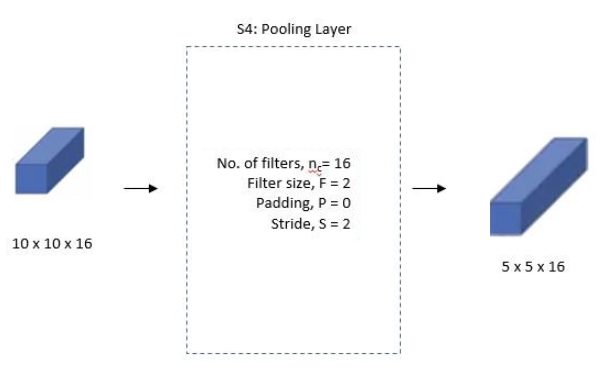

In [74]:
layer_s4 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name="S4")
lenet.add(layer_s4)

## Layer F5

- **INPUT**: Tensor of size $5 \times 5 \times 6$, or in other words $16 \times 5 \times 5 = 400$ neurons. 

- **Dense**: Every neuron in F5 in connected to all the neurons in S4. 

- **Output**: $120$ neurons 

**Activation function**: $\tanh$

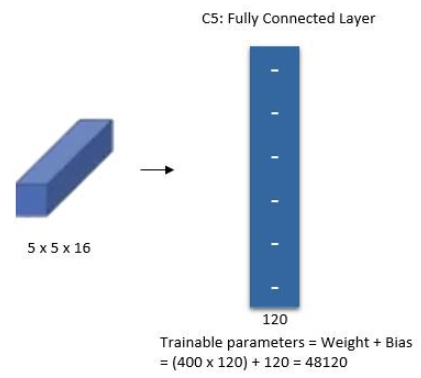

In [75]:
flatten_input = tf.keras.layers.Flatten()
lenet.add(flatten_input) # flattening 
layer_f5 = tf.keras.layers.Dense(120, activation="tanh", name="F5")
lenet.add(layer_f5)

## Layer F6


- **INPUT**: $120$ Neurons. 

- **Dense**: Every neuron in F6 in connected to all the neurons in F5. 

- **Output**: $84$ neurons

**Activation function**: $\tanh$

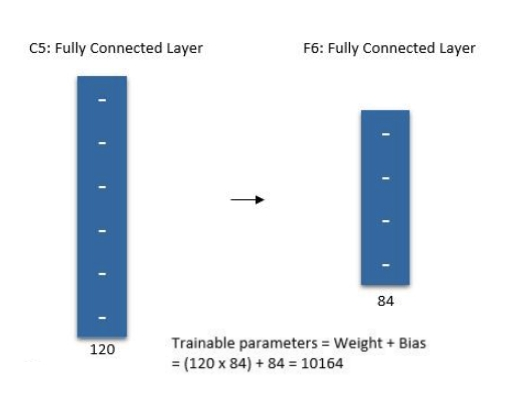

In [76]:
layer_f6 = tf.keras.layers.Dense(84, activation="tanh", name="F6")
lenet.add(layer_f6)

## Layer OUTPUT

- **INPUT**: $84$ Neurons. 

- **Dense**:  Every neuron in OUTPUT layer in connected to all the neurons in F6.

- **Output**: $10$ neurons

**Activation function**: $\mbox{softmax}$

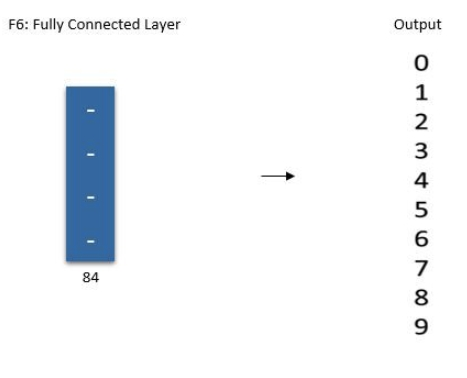

In [77]:
layer_out = tf.keras.layers.Dense(10, activation="softmax", name="out")
lenet.add(layer_out)

In [78]:
lenet.build((None, 32, 32, 1))
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 28, 28, 6)         156       
                                                                 
 S2 (AveragePooling2D)       (None, 14, 14, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 10, 10, 16)        2416      
                                                                 
 S4 (AveragePooling2D)       (None, 5, 5, 16)          0         
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 F5 (Dense)                  (None, 120)               48120     
                                                                 
 F6 (Dense)                  (None, 84)               

## ImageNet Challenge (ILSVRC)

 The ImageNet Large Scale Visual Recognition Challenge  (https://www.image-net.org/challenges/LSVRC/ ) is a benchmark in object category classification and detection on hundreds of object categories and millions of images. The https://www.image-net.org/ is an image database organized according to the WordNet hierarchy
    
In 30 September 2012, a convolutional neural network (CNN) called AlexNet achieved a top-5 accuracy 84.6\% in the ImageNet 2012 Challenge.
    
Top-5 accuracy means any of our model's top 5 highest probability answers match with the expected answer.
    
Today's popular Deep (tens or hundreds of millions of trainable parameters) Neural Networks achieve over 90\% top-5 accuracy on ImageNet database. 
    
It is worth mentioning networks such as Xception (95\% top-5 accuracy), VGG16 (90\%), ResNet (92\%), MobileNet (90\%), EfficientNet (95\%). All these are included (together with the trained weights) in Keras applications https://keras.io/api/applications/.

## AlexNet Architecture Summary

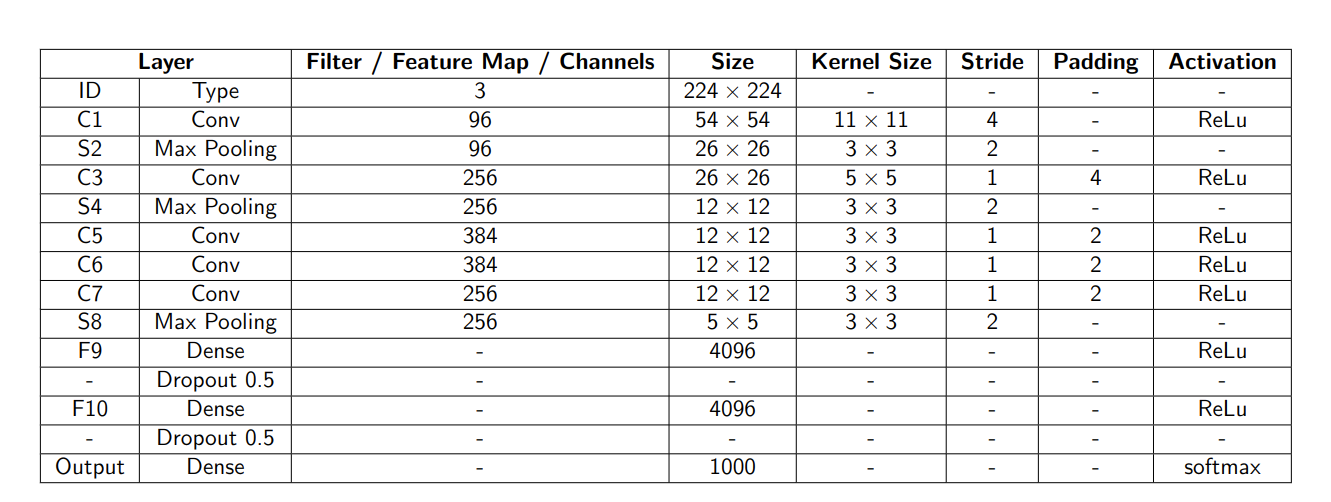

**AlexNet** has nearly 50 million trainable parameters. 

AlexNet is considered one of the most influential papers published in computer vision, having spurred many more papers published employing CNNs and GPUs to accelerate deep learning. It has been cited over 80,000 times according to Google Scholar.

Note that AlexNet using non-saturating activation functino ReLu

AlexNet uses Dropout layers to prevent overfitting. 
The **Dropout** layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by $\frac{1}{1 - \text{rate}}$ such that the sum over all inputs is unchanged.



### Time for Exercise 2.2


# Transfer Learning

Transfer Learning is a method of re-using a pre-trained model (usually on a large amount of images, e.g. ImageNet database) on a new task. 
    In this case we can take any of the deep neural networks from keras applications include their weights from ImageNet database, re-train only selected layers and modify the dense layers to fit to our problem. 

# Keras Funcional API

The Keras functional API handles more flexible models than the tf.keras.Sequential API. 

It allows models with non-linear topology, shared layers, and even multiple inputs or outputs.

# Example Model

In [ ]:
inputs = tf.keras.Input(shape=(784,))
dense = tf.keras.layers.Dense(64, activation="relu")
x = dense(inputs)
outputs = tf.keras.layers.Dense(10)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="model via functional API")

In [ ]:
model.summary()

Model: "model via functional API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Time for Exercise 2.3

# Inception Layers (GoogLeNet)

GoogLeNet (also known as Inception V1) was proposed by researchers from Google  in 2014 in the research paper **Going Deeper with Convolutions** (https://arxiv.org/abs/1409.4842). This model won ImageNet 2014 Challenge. GoogLeNet has 6 times less parameters than AlexNet. 

Quoting the paper

“In this paper, we will focus on an efficient deep neural network architecture for computer vision, code named Inception, which derives its name from (…) the famous “we need to go deeper” internet meme.”



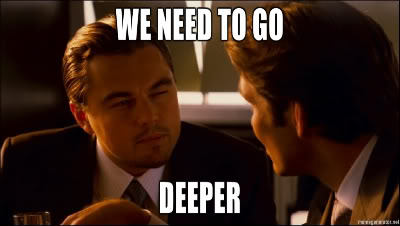

GoogLeNet consisted of a few **Inception Modules**, these are $1\times 1$, $3 \times 3$, $5 \times 5$ convolutions and $3\times 3$ max pooling performed in parallel after the input, the outputs were concatenated together. 

The main advantage of these layers is that convolution filters of different sizes better handle input data at varying scales. 

The architecture of these layers is introduced below:

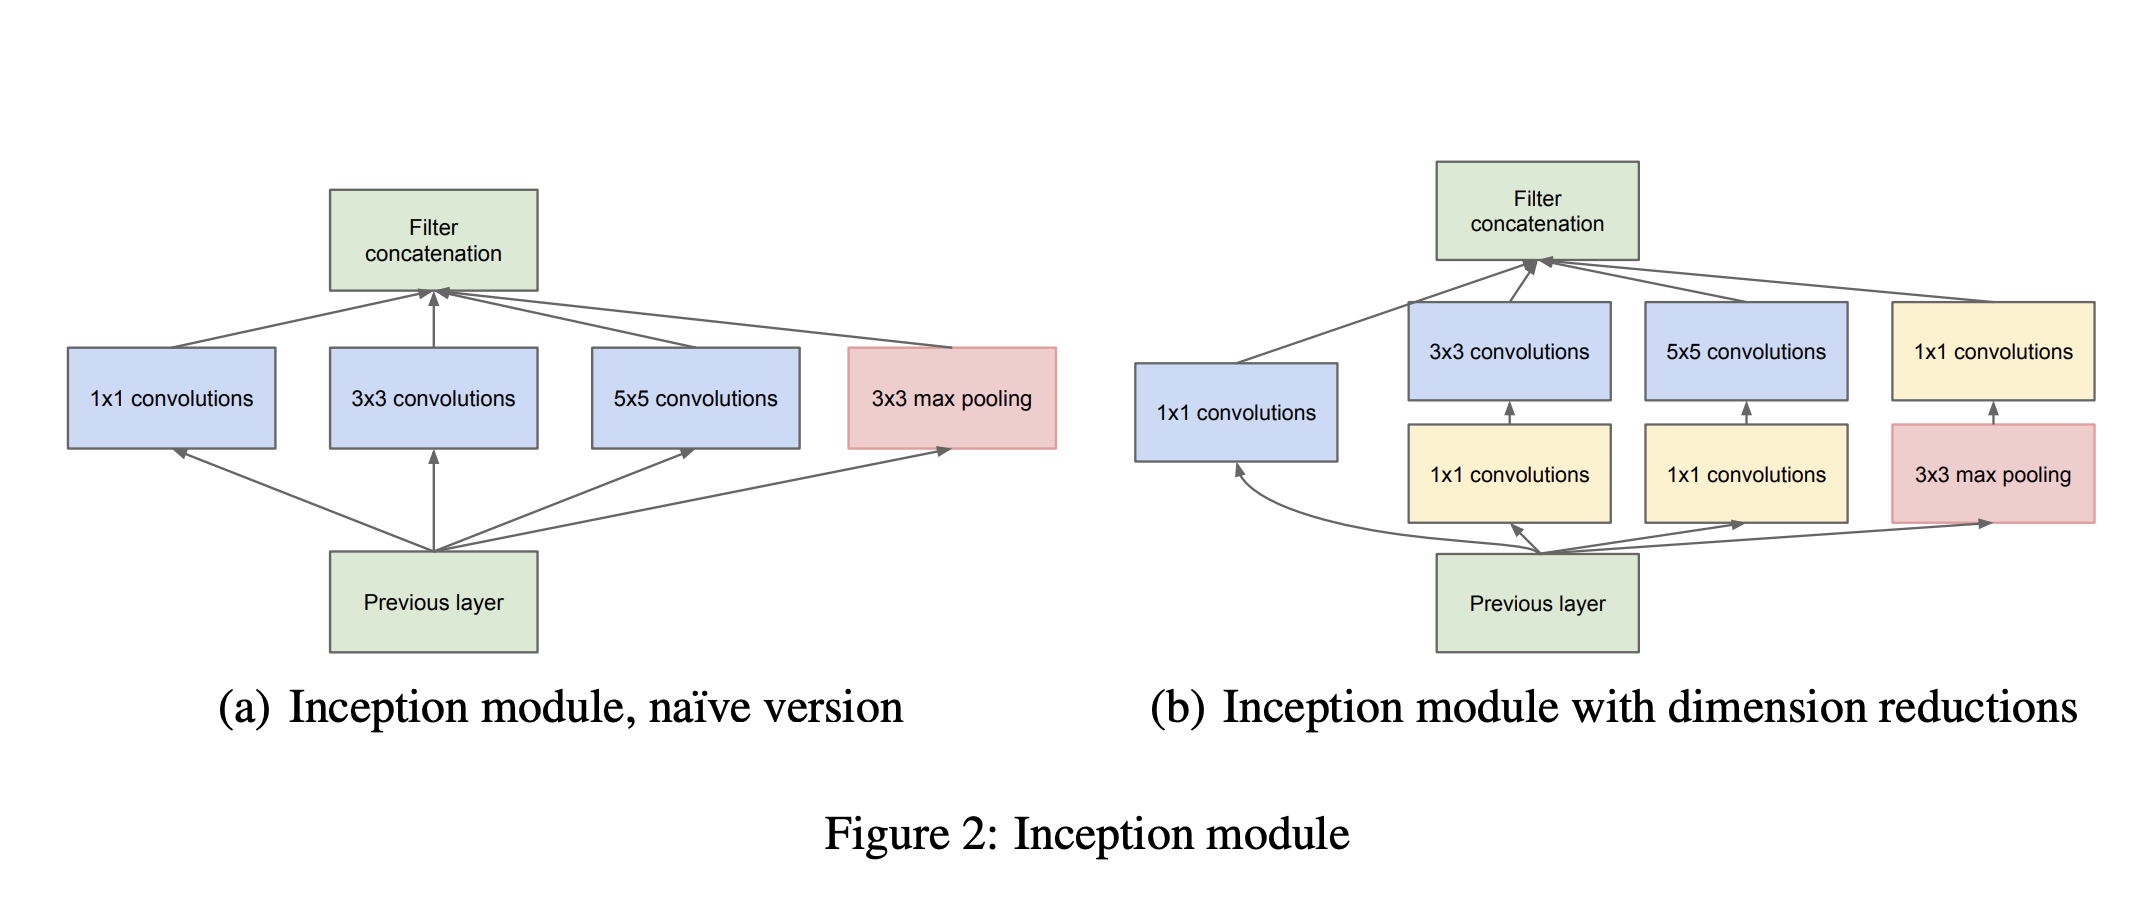

Let us demonstrate how to create an inception module in Keras:

In [ ]:
def inception_module(inputs,
                     filters_1x1=160,
                     filters_3x3_reduced=112,
                     filters_3x3=156,
                     filters_5x5_reduced=32,
                     filters_5x5=64,
                     filters_pool=64,
                     ):

    block0 = tf.keras.layers.Conv2D(filters_1x1, (1,1), padding='same', activation='relu')(inputs)

    block1 = tf.keras.layers.Conv2D(filters_3x3_reduced, (1,1), padding='same', activation='relu')(inputs)
    block1 = tf.keras.layers.Conv2D(filters_3x3, (3,3), padding='same', activation='relu')(block1)

    block2 = tf.keras.layers.Conv2D(filters_5x5_reduced, (1,1), padding='same', activation='relu')(inputs)
    block2 = tf.keras.layers.Conv2D(filters_5x5, (5,5), padding='same', activation='relu')(block2)

    block3 = tf.keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(inputs)
    block3 = tf.keras.layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(block3)

    output = tf.keras.layers.concatenate([block0, block1, block2, block3], axis = -1)
    return output

In the paper **GlobalAveragePooling2D** was used instead of Flatten. 

GlobalAveragePooling2D applies average pooling on the spatial dimensions until each spatial dimension is one, and leaves other dimensions unchanged

Below we desing a CNN with one inception module. 

In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
inception_layer = inception_module(input_layer)
flat_layer = tf.keras.layers.GlobalAveragePooling2D()(inception_layer)
dense = tf.keras.layers.Dense(256, activation="relu")(flat_layer)
dropout = tf.keras.layers.Dropout(0.5)(dense)
out = tf.keras.layers.Dense(10, activation='softmax')(dropout)

In [ ]:
inception_model = tf.keras.Model(inputs=input_layer, outputs=out)

In [ ]:
inception_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_79 (Conv2D)             (None, 224, 224, 11  448         ['input_14[0][0]']               
                                2)                                                                
                                                                                                  
 conv2d_81 (Conv2D)             (None, 224, 224, 32  128         ['input_14[0][0]']               
                                )                                                          

Architecture of GoogLeNet:

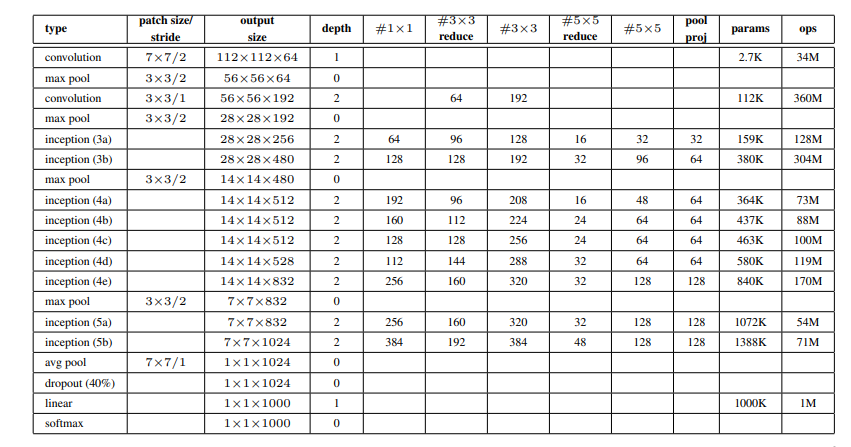

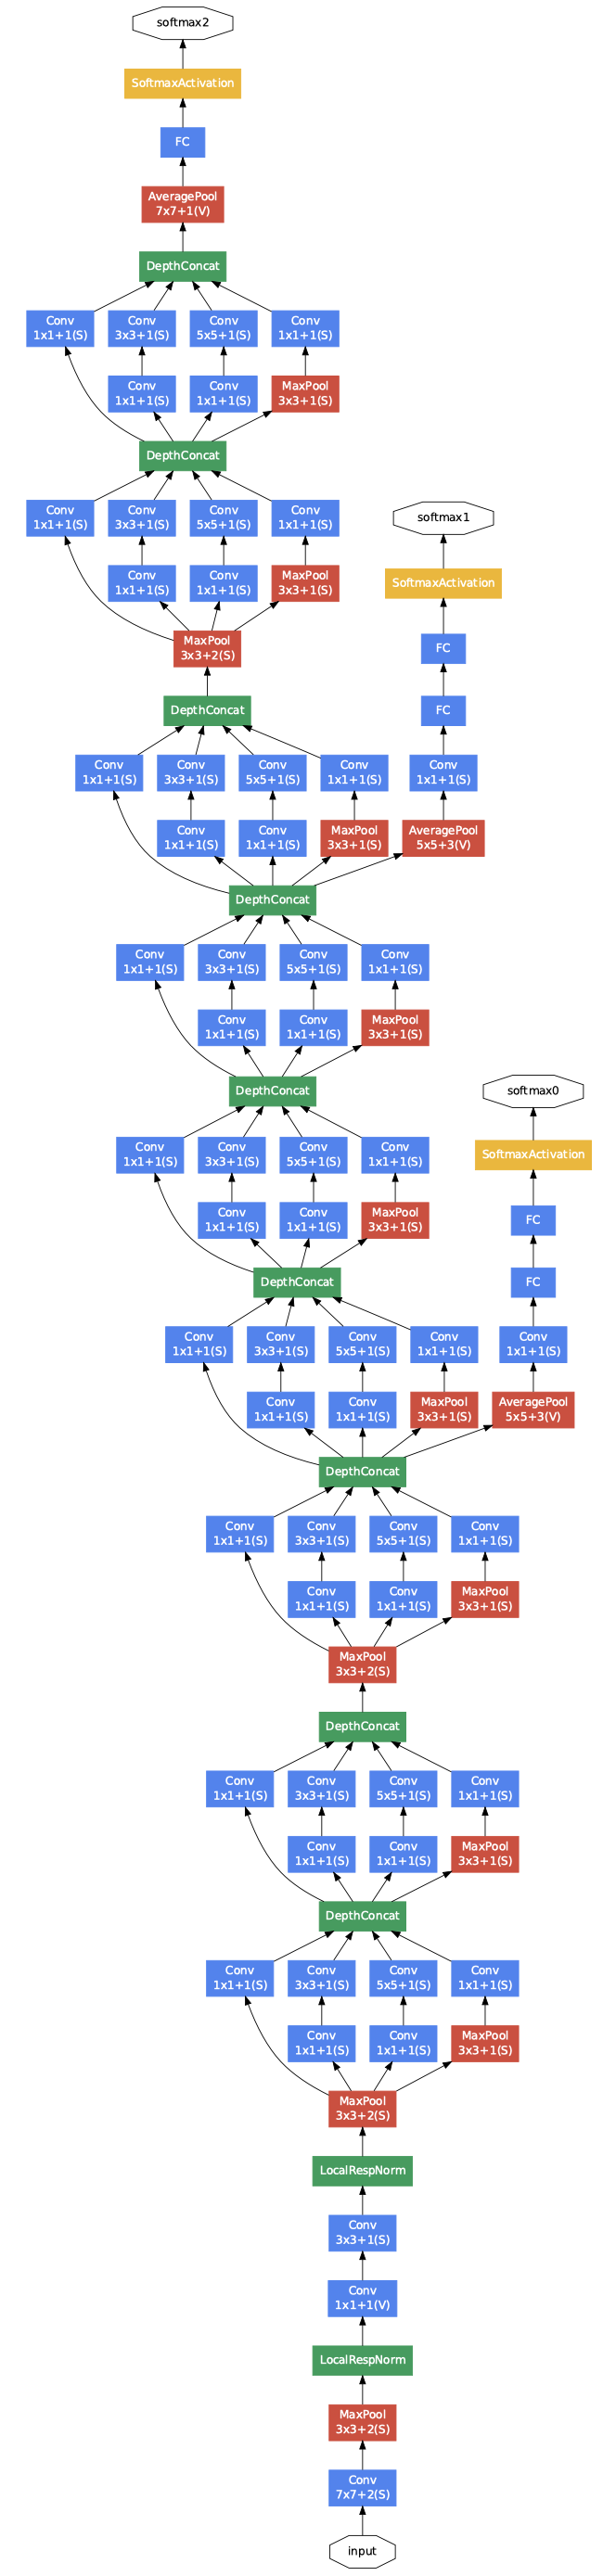

See also https://pdfs.semanticscholar.org/0b99/d677883883584d9a328f6f2d54738363997a.pdf